<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/llibre-estil/logo-UOC-masterbrand-vertical.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.983 · Aprenentatge per reforç</p>
<p style="margin: 0; text-align:right;">2024-1 · Màster universitari en Ciència de dades (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'informàtica, multimèdia i telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# PAC2: Deep Reinforcement Learning


En aquesta pràctica s'implementaran models de DRL en dos entorns diferents, amb l'objectiu d'analitzar diferents formes d'aprenentatge d'un agent i estudiar-ne el rendiment. L'agent serà entrenat amb els mètodes:
<ol>
    <li>DQN</li>
    <li>Dueling DQN</li>
</ol>
  
**Important: El lliurament s'ha de fer en format notebook i en format html on es vegi el codi, els resultats i comentaris de cada exercici. Per exportar el notebook a html es pot fer des del menú File → Download as → HTML.**

## 0. Context

L'aprenentatge per reforç és un camp de la intel·ligència artificial que cerca desenvolupar sistemes capaços d'aprendre i prendre decisions autònomes a través de la interacció amb el seu entorn. Al llarg dels anys aquest enfocament ha demostrat la seva capacitat per abordar una àmplia gamma d'aplicacions, des de jocs de taula fins a robòtica i gestió de recursos. Tot i això, una de les qüestions més desafiadores en l'aprenentatge per reforç és la creació d'entorns de simulació adequats que reflecteixin fidelment el context de l'aplicació desitjada.


En aquest context, aquesta PAC té com a objectiu desenvolupar un nou entorn de simulació que permeti la investigació i l'experimentació amb diferents agents de trading. Aquest entorn estarà dissenyat específicament per abordar un problema fictici d'inversió i gestió d'un portafoli al mercat de valors, en el que un agent ha d'aprendre a prendre decisions òptimes de compra, venda o manteniment d'accions. L'objectiu de l'agent serà maximitzar els guanys al llarg del temps mitjançant estratègies basades en l'aprenentatge per reforç.

Per a portar-ho a terme, s'utilitzarà un entorn adaptat a les especificacions de Gymnasium (https://gymnasium.farama.org/index.html), que permet la creació d'entorns personalitzats per a l'aprenentatge per reforç. Aquest entorn simularà el comportament dinàmic d'un mercat financer, amb fluctuacions en els preus de les accions i esdeveniments del mercat que afecten les decisions de l'agent.


## 1. Creació d'un entorn en Gym (3 punts)

En aquest exercici dissenyem un entorn senzill seguint l'esquema dels entorns de <code>Gymnasium</code>, i tractarem de resoldre'l.

Els entorns de <code>Gymnasium</code> acostumen a tenir la següent estructura:

```
class FooEnv(gym.Env):
  metadata = {'render.modes': ['human']}

  def __init__(self):
    ...
  def step(self, action):
    ...
    return new_state, reward, terminated, truncated, info

  def reset(self):
    ...
    return observation, info

  def render(self, mode='human', close=False):
    ...

 ```


El primer pas serà instal·lar les llibreries necessàries per abordar la PAC:


In [1]:
!pip install gymnasium
!pip install torch

!pip install matplotlib
!pip install numpy
!pip install tensorboard
!pip install tdqm
!pip install tabulate
!pip install yfinance==0.2.50
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

y las importamos:

In [2]:
import numpy as np
import gymnasium as gym
import random
import matplotlib.pyplot as plt
from gymnasium.spaces import Discrete, Box
from collections import namedtuple, deque
from copy import deepcopy
import math
import time
import torch
import torch.nn.functional as F
from tabulate import tabulate
import pandas as pd
import yfinance as yf
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

print("Gym Version:", gym.__version__)  # 1.0.0
print("Torch Version:", torch.__version__)  # 2.5.1+cu121

Gym Version: 1.0.0
Torch Version: 2.5.1+cu124


### 1.1 Entorn de Simulació per al Trading Automàtic al Mercat de Valors

**Enhorabona!** Una firma d'inversió ha decidit contractar-vos per desenvolupar un sistema de trading automàtic per a les seves operacions al mercat de valors. Per a això, us demanen que dissenyeu un entorn de simulació que permeti entrenar un agent capaç de prendre decisions de compra, venda o mantenir posicions sobre una acció determinada, maximitzant els guanys al llarg del temps. L'entorn ha de complir les següents especificacions:

- L'entorn s'ha d'anomenar `StockMarketEnv`.
- L'entorn ha d'heretar de la classe `gym.Env`.
- El preu inicial de l'acció estarà basat en dades històriques, obtingudes a partir d'una consulta a Yahoo Finance.
- El balanç inicial de l'agent serà de 10.000 dòlars, els quals es podran utilitzar per comprar accions.
- L'agent pot realitzar les següents accions:
  - `0` -> Mantenir (no es realitzen operacions).
  - `1` -> Comprar (es compren totes les accions possibles al preu actual).
  - `2` -> Vendre (es venen totes les accions disponibles al preu actual).
- El sistema de recompenses serà el següent:
  - L'agent rep una recompensa de +1 si el valor net del seu portafoli (balanç_actual + balanç_anterior) augmenta respecte al pas anterior.
  - L'agent rep una recompensa de +1 si el valor net del seu portafoli (balanç_actual) es manté igual, no posseeix cap acció i el valor de les accions disminueix. Aquesta comprovació no es realitza el primer dia de trading.
  - L'agent rep una recompensa de -1 si el valor net del seu portafoli (balanç_actual) es manté igual, no posseeix cap acció i el valor de les accions augmenta respecte al dia anterior. Aquesta comprovació no es realitza el primer dia de trading.
  - Si el valor net disminueix respecte al dia anterior, l'agent rep una recompensa de -1.
  - En altres casos, rep una puntuació de 0.
- L'entorn tindrà una durada per defecte per a l'entrenament del `2019-01-01` al `2021-01-01`.
- L'entorn finalitzarà si el valor net del portafoli cau per sota del 85% del balanç inicial (és a dir, 8.500 dòlars).

L'objectiu d'aquest entorn és que l'agent aprengui a prendre decisions òptimes de compra i venda.


In [3]:
import numpy as np
import gymnasium as gym
import random
import matplotlib.pyplot as plt
from gymnasium.spaces import Discrete, Box
from collections import namedtuple, deque
from copy import deepcopy
import math
import time
import torch
import torch.nn.functional as F
from tabulate import tabulate
import pandas as pd
import yfinance as yf
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

print("Gym Version:", gym.__version__)  # 1.0.0
print("Torch Version:", torch.__version__)  # 2.5.1+cu121

Gym Version: 1.0.0
Torch Version: 2.5.1+cu124



![Imagen de Stock Market](https://media1.tenor.com/m/wWvt6qEQB8EAAAAd/kah.gif)

#### 1.1.1 Implementació dels indicadors econòmics

El primer pas és implementar dues funcions anomenadaes `calculate_rsi` i `calculate_ema` que calcularan diferents indicadors tècnics utilitzats en l'anàlisi de mercats financers. Aquests indicadors ajudaran els agents de trading a prendre decisions basades en patrons i tendències del mercat.

A continuació, s'explica en què consisteixen aquestes mètriques:

- **RSI (Índex de Força Relativa)**: Calcula l'RSI utilitzant el canvi de preu durant una finestra de temps especificada. Aquest indicador mostra si un actiu està sobrecomprat o sobrevenut. Podeu veure una explicació més detallada a https://es.wikipedia.org/wiki/%C3%8Dndice_de_fuerza_relativa
- **EMA (Mitjana Mòbil Exponencial)**: Calcula l'EMA, que és una versió ponderada de la mitjana mòbil que dóna més pes als preus recents. Podeu veure una explicació més de tallada a https://es.tradingview.com/support/solutions/43000592270/

Les funcions prenen alguns dels següents arguments:

- `data`: Les dades històriques de preus de les accions, generalment en format de sèries temporals. En aquest exemple, utilitzarem els preus de tancament diaris.
- `window` (opcional): El nombre de períodes a utilitzar per als càlculs dels indicadors. Per defecte, s'assumeix un valor de 14 per al RSI i l'EMA.

A continuació, es mostren les funcions:


In [4]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi.fillna(50).squeeze()

def calculate_ema(data, window=14):
    return data.ewm(span=window, adjust=False).mean().squeeze()


Amb aquestes funcions, els agents podran utilitzar informació tècnica clau sobre les accions al mercat per prendre decisions de trading més informades.

Ara bé, necessitem el valor de les accions. Per a aquest projecte, utilitzem la llibreria yfinance, que permet obtenir dades històriques d'actius financers de manera senzilla. El següent fragment de codi descarrega les dades de l'ETF SPY (un fons que segueix l'índex S&P 500) des de l'1 de gener de 2021 fins a l'1 de gener de 2022:

In [5]:
data = yf.download("SPY", start="2021-01-01", end="2022-01-01")

print(data)


[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker             SPY         SPY         SPY         SPY         SPY   
Date                                                                     
2021-01-04  348.299408  368.790009  375.450012  364.820007  375.309998   
2021-01-05  350.698212  371.329987  372.500000  368.049988  368.100006   
2021-01-06  352.794922  373.549988  376.980011  369.119995  369.709991   
2021-01-07  358.036621  379.100006  379.899994  375.910004  376.100006   
2021-01-08  360.076599  381.260010  381.489990  377.100006  380.589996   
...                ...         ...         ...         ...         ...   
2021-12-27  456.750977  477.260010  477.309998  472.010010  472.059998   
2021-12-28  456.377716  476.869995  478.809998  476.059998  477.720001   
2021-12-29  456.961548  477.480011  478.559998  475.920013  476.980011   
2021-12-30  455.698212  476.160004  479.000000  475.670013  477.929993   
2021-12-31  454.549713  474.959991  47

El resultat és un **DataFrame** que conté la següent informació per a cada dia del rang de dates:

- **Open**: Preu d'obertura de l'actiu.
- **High**: Preu màxim de l'actiu durant el dia.
- **Low**: Preu mínim de l'actiu durant el dia.
- **Close**: Preu de tancament de l'actiu.
- **Adj Close**: Preu ajustat que té en compte dividends i splits.
- **Volume**: Nombre d'accions negociades.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Exercici 1.1 (0.25 pts):</strong>
    Utilitza les dades històriques del mercat financer, descarregades mitjançant la funció <code>yfinance.download</code>, i aplica els indicadors tècnics proporcionats: <code>calculate_rsi</code> i <code>calculate_ema</code>.
    A continuació, realitza les següents tasques:
    <ul>
        <li>Descarrega les dades històriques de SPY per a l'any 2021.</li>
        <li>Calcula l'RSI per als preus de tancament durant el període.</li>
        <li>Calcula la mitjana mòbil exponencial (EMA) per al mateix període amb els preus de tancament.</li>
        <li>Imprimeix l'últim valor dels càlculs de cada indicador (RSI i EMA) per verificar que s'han generat correctament sense errors. Aquests valors haurien de ser RSI: 53.765164 i EMA: 470.690088 (el nombre de decimals pot variar).</li>
    </ul>
</div>


In [6]:
# Download historical data for SPY (2021)
data = yf.download("SPY", start="2021-01-01", end="2022-01-01")

# Extract closing prices
close_prices = data["Close"]

# RSI and EMA
rsi = calculate_rsi(close_prices)
ema = calculate_ema(close_prices)

# Print the last value of RSI and EMA for verification
print("Last RSI value:", rsi.iloc[-1])
print("Last EMA value:", ema.iloc[-1])

[*********************100%***********************]  1 of 1 completed

Last RSI value: 53.76516415158352
Last EMA value: 470.6900882953319


#### 1.1.2 Implementació de StockMarketEnv

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Exercici 1.2 (2.25 pts):</strong> Defineix l'entorn <code>StockMarketEnv</code> seguint les indicacions aportades anteriorment.
    A més, a banda de les típiques funcions de qualsevol entorn (<code>reset</code>, <code>step</code> i <code>render</code>), s'han d'implementar dos funcions més (<code>save_to_csv_file</code> i <code>_normalize</code>) que s'expliquen a continuació:
</div>


##### Crear la funció <code>save_to_csv_file</code> en Python
Implementa una funció <code>save_to_csv_file</code> que guardi les dades actuals d'una classe en un fitxer CSV. La funció calcularà el benefici (<code>profit</code>) com la diferència entre el valor net actual (<code>net_worth</code> -> balanç efectiu + valor de les accions en possessió) i el balanç inicial (<code>initial_balance</code>), i escriurà una nova fila amb els valors de <code>current_step</code>, <code>balance</code>, <code>shares_held</code>, <code>net_worth</code> i <code>profit</code> en el fitxer CSV.



##### Crear la funció de normalització en Python

La funció `_normalize` s'utilitza per ajustar un valor a un rang estàndard, comunament entre 0 i 1, en relació amb un valor mínim i màxim especificats. Aquest procés, conegut com a **normalització**, és útil per transformar dades, mantenint les seves proporcions relatives, dins d'un interval més manejable. La funció pren tres paràmetres:

- `value`: el valor a normalitzar.
- `min_val`: el límit inferior del rang de normalització.
- `max_val`: el límit superior del rang de normalització.

La normalització es realitza mitjançant la següent fórmula:

$$
\text{normalized_value} = \frac{\text{value} - \text{min_val}}{\text{max_val} - \text{min_val}}
$$

Aquest càlcul ajusta `value` al rang definit entre `min_val` i `max_val`. A més, si `max_val` i `min_val` són iguals, la funció retorna `0` per evitar una **divisió per zero**.

##### Beneficis en el Context de l'Aprenentatge per Reforç (RL)

En un entorn d'**aprenentatge per reforç (RL)**, la normalització és fonamental per diverses raons:

1. **Estabilitat d'Entrenament**: Al normalitzar les recompenses, les observacions o les accions a un rang estàndard, s'evita que valors grans desestabilitzin el procés d'aprenentatge. Els models de RL, com les xarxes neuronals, tendeixen a aprendre millor amb dades en intervals limitats.

2. **Facilita la Comparació**: La normalització permet comparar dades provinents de diferents fonts o escales, com recompenses de diferents entorns, cosa que millora la generalització del model.

3. **Accelera la Convergència**: Dades escalades de manera uniforme ajuden que els algoritmes de RL convergeixin més ràpidament, ja que es redueix la variabilitat de les entrades.

4. **Prevé Errors de Càlcul**: En gestionar entrades normalitzades i amb límits definits, s'eviten errors de càlcul o inestabilitats degudes a diferències numèriques extremes.
----
<b>Nota</b>: se us proporciona el codi preimplementat. La implementació que es demana en l'enunciat està indicada en els blocs <i>#TODO</i> i/o amb variables igualades a <i>None</i>.

In [7]:
import os
import csv

start = "2019-01-01"
end = "2021-01-01"
ticker = "SPY"
initial_balance = 10000

class StockMarketEnv(gym.Env):
    def __init__(self, ticker=ticker, initial_balance=initial_balance, is_eval=False,
                 start = start, end = end, save_to_csv=False,
                 csv_filename="stock_trading_log.csv"):
        super(StockMarketEnv, self).__init__()

        # Descarregar les dades històriques de l'acció
        self.df = yf.download(ticker, start=start, end=end)
        self.num_trading_days = len(self.df)
        self.prices = self.df['Close'].values
        self.n_steps = len(self.prices) - 1

        # Paràmetres de l'entorn
        self.initial_balance = initial_balance
        self.current_step = 0
        self.balance = float(initial_balance)
        self.shares_held = 0
        self.net_worth = initial_balance
        self.previous_net_worth = initial_balance

        # Espai d'accions: 0 -> mantenir, 1 -> comprar, 2 -> vendre
        self.action_space = Discrete(3)

        # Calculem els indicadors tècnics
        self.rsi = calculate_rsi(self.df['Close']).values
        self.ema = calculate_ema(self.df['Close']).values

        # Espai d'observacions: [preu_actual, balanç, accions, rsi, ema]
        self.observation_space = Box(
            low=0, high=1, shape=(5,), dtype=np.float32
        )
        self.is_eval = is_eval

        # Valores para normalización (obtenemos mínimos y máximos)
        self.min_price = self.prices.min()
        self.max_price = self.prices.max()
        self.min_rsi = self.rsi.min()
        self.max_rsi = self.rsi.max()
        self.min_ema = self.ema.min()
        self.max_ema = self.ema.max()

        # Paràmetres addicionals per al fitxer CSV
        self.save_to_csv = save_to_csv
        self.csv_filename = csv_filename

        # Si l'opció de desar en CSV està activada, crea o sobreescriu el fitxer
        if self.save_to_csv:
            with open(self.csv_filename, 'w', newline='') as file:
                writer = csv.writer(file)
                writer.writerow(['Step', 'Balance', 'Shares Held', 'Net Worth', 'Profit'])

    def reset(self):
        """Reset the environment to its initial state."""
        self.current_step = 0
        self.balance = self.initial_balance
        self.shares_held = 0
        self.net_worth = self.initial_balance
        self.previous_net_worth = self.initial_balance
        return self._next_observation(), {}

    def _normalize(self, value, min_val, max_val):
        """Normalize a value between 0 and 1."""
        if max_val == min_val:
            return 0.0
        normalized_value = (value - min_val) / (max_val - min_val)
        return float(normalized_value)

    def _next_observation(self):
        #  Normalitzem els valors
        norm_price = self._normalize(self.prices[self.current_step], self.min_price, self.max_price)
        norm_balance = self._normalize(self.balance, self.initial_balance * 0.85, self.initial_balance * 1.25)
        norm_shares_held = self._normalize(self.shares_held, 0, 100)  # Màxim de 100 accions
        norm_rsi = self._normalize(self.rsi[self.current_step], self.min_rsi, self.max_rsi)
        norm_ema = self._normalize(self.ema[self.current_step], self.min_ema, self.max_ema)

        return np.array([
            norm_price,
            norm_balance,
            norm_shares_held,
            norm_rsi,
            norm_ema,
        ])


    def step(self, action):
        """Execute one time step within the environment."""
        if self.current_step >= self.n_steps:
            terminated = True
            truncated = False
            return self._next_observation(), 0, terminated, truncated, {}

        current_price = self.prices[self.current_step]
        reward = 0

        # Acció: 0 -> mantenir, 1 -> comprar, 2 -> vendre
        if action == 1:  # Buy
            shares_bought = int(self.balance // current_price)
            self.balance = float(self.balance - shares_bought * current_price)
            self.shares_held = int(self.shares_held + shares_bought)
        elif action == 2:  # Sell
            self.balance = float(self.balance + self.shares_held * current_price)
            self.shares_held = 0

        # Actualitzar el preu anterior
        self.previous_net_worth = self.net_worth
        self.net_worth = float(self.balance + (self.shares_held * current_price))

        # Calcular la recompensa
        reward = self._calculate_reward()

        # Avançar al següent pas
        self.current_step += 1
        terminated = self.net_worth < (0.85 * self.initial_balance)
        truncated = self.current_step >= self.n_steps

        if self.save_to_csv:
            self.save_to_csv_file()

        # Retorna l'observació, la recompensa, si està complet, i altra informació addicional
        return self._next_observation(), reward, terminated, truncated, {}

    def _calculate_reward(self):
        reward = 0
        # primera etapa no computada
        if self.current_step == 0:
            return 0

        current_price = self.prices[self.current_step]
        previous_price = self.prices[self.current_step - 1]

        # net worth increased
        if self.net_worth > self.previous_net_worth:
            return 1
        # net worth decreased
        if self.net_worth < self.previous_net_worth:
            return -1
        if self.net_worth == self.previous_net_worth:
            # shares worth less than before
            if self.shares_held == 0 and current_price < previous_price:
                return 1
            # shares worth more than before
            if self.shares_held == 0 and current_price > previous_price:
                return -1
        return reward

    def render(self, mode='human'):
        """Render the environment state."""
        profit = float(self.net_worth - self.initial_balance)
        print(f"Step: {self.current_step}")
        print(f"Balance: {self.balance}")
        print(f"Shares held: {self.shares_held}")
        print(f"Net worth: {self.net_worth}")
        print(f"Profit: {profit}")

    def save_to_csv_file(self):
        """Desa les dades actuals al fitxer CSV."""
        profit = self.net_worth - self.initial_balance
        with open(self.csv_filename, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([self.current_step, self.balance, int(self.shares_held), self.net_worth, profit])

La següent cel·la és de **comprovació** i ha de generar la sortida que es mostra a continuació. Aquesta sortida serveix per verificar que tot s'ha implementat correctament. En executar la cel·la, la sortida ha de coincidir exactament amb el resultat següent:


```
------------------------------------------------------------------------------------
(array([0.14086006, 0.375     , 0.        , 0.45140651, 0.        ]), 0, False, False, {})
------------------------------------------------------------------------------------
(array([ 0.19505732, -2.06710007,  0.4       ,  0.45140651,  0.00333123]), 0, False, False, {})
------------------------------------------------------------------------------------
(array([ 0.20824227, -2.06710007,  0.4       ,  0.45140651,  0.00842359]), 1, False, False, {})
------------------------------------------------------------------------------------
(array([0.22407732, 0.47669998, 0.        , 0.45140651, 0.01548553]), 1, False, False, {})
------------------------------------------------------------------------------------
Step: 4  
Balance: 10406.799926757812  
Shares held: 0  
Net worth: 10406.799926757812  
Profit: 406.7999267578125  
None  
------------------------------------------------------------------------------------
(array([0.23202811, 0.47669998, 0.        , 0.45140651, 0.02293572]), -1, False, False, {})
------------------------------------------------------------------------------------
Step: 5  
Balance: 10406.799926757812  
Shares held: 0  
Net worth: 10406.799926757812  
Profit: 406.7999267578125  
None  
------------------------------------------------------------------------------------
(array([ 0.23805742, -2.10300003,  0.4       ,  0.45140651,  0.03040101]), 0, False, False, {})
------------------------------------------------------------------------------------
Step: 6  
Balance: 87.9998779296875  
Shares held: 40  
Net worth: 10406.799926757812  
Profit: 406.7999267578125  
None  
------------------------------------------------------------------------------------
```

In [8]:
env = StockMarketEnv()
env.reset()
print('------------------------------------------------------------------------------------')
print(env.step(0))
print('------------------------------------------------------------------------------------')
print(env.step(1))
print('------------------------------------------------------------------------------------')
print(env.step(1))
print('------------------------------------------------------------------------------------')
print(env.step(2))
print('------------------------------------------------------------------------------------')
print(env.render())
print('------------------------------------------------------------------------------------')
print(env.step(0))
print('------------------------------------------------------------------------------------')
print(env.render())
print('------------------------------------------------------------------------------------')
print(env.step(1))
print('------------------------------------------------------------------------------------')
print(env.render())
print('------------------------------------------------------------------------------------')



[*********************100%***********************]  1 of 1 completed


------------------------------------------------------------------------------------
(array([0.14086006, 0.375     , 0.        , 0.45140651, 0.        ]), 0, False, False, {})
------------------------------------------------------------------------------------
(array([ 0.19505732, -2.06710007,  0.4       ,  0.45140651,  0.00333123]), 0, False, False, {})
------------------------------------------------------------------------------------
(array([ 0.20824227, -2.06710007,  0.4       ,  0.45140651,  0.00842359]), 1, False, False, {})
------------------------------------------------------------------------------------
(array([0.22407732, 0.47669998, 0.        , 0.45140651, 0.01548553]), 1, False, False, {})
------------------------------------------------------------------------------------
Step: 4
Balance: 10406.799926757812
Shares held: 0
Net worth: 10406.799926757812
Profit: 406.7999267578125
None
------------------------------------------------------------------------------------
(arr

#### 1.1.3 Interacció amb l'Entorn StockMarketEnv

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Exercici 1.3 (0.5 pts):</strong> Carregar l'entorn <code>StockMarketEnv</code> i realitzar les següents tasques:
    <ul>
        <li>Mostrar l'espai d'accions i l'espai d'observacions.</li>
        <li>Executar 100 episodis amb accions aleatòries, mostrant la recompensa mitjana obtinguda entre totes les partides.</li>
        <li>Executar una partida aleatòria i mostrar el render en finalitzar-la.</li>
        <li>Provar la funció <code>save_to_csv_file</code> i mostrar el resultat de les darreres 5 files.</li>
    </ul>
</div>


In [9]:
env = StockMarketEnv()

[*********************100%***********************]  1 of 1 completed


In [10]:
# Display the action space and observation space
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")

Action Space: Discrete(3)
Observation Space: Box(0.0, 1.0, (5,), float32)


In [11]:
import numpy as np

episodes = 100
total_reward = 0

for _ in range(episodes):
    state = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()  # Select a random action
        _, reward, done, _, _ = env.step(action)
        total_reward += reward

mean_reward = total_reward / episodes
print(f'\nMean reward over {episodes} episodes: {mean_reward}')


Mean reward over 100 episodes: 12.81


In [12]:
import time

state, _ = env.reset()
done = False

while not done:
    #env.render() #Uncomment to see all steps
    #time.sleep(0.1)
    action = env.action_space.sample()  #Random action
    state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated

env.render()

Step: 301
Balance: 89.25051879882812
Shares held: 33
Net worth: 8276.88053894043
Profit: -1723.1194610595703


In [13]:
import pandas as pd
def provar_save_to_csv(env, rows):
    """
    Provar la funció save_to_csv_file executant diverses accions
    a l'entorn i després mostrant les últimes 5 files del fitxer CSV.

    Paràmetres:
        env: L'entorn StockMarketEnv.
        rows: El número de files que es volen mostrar del fitxer CSV.
    """
    # Executar passos a l'entorn amb accions aleatòries
    state, _ = env.reset()
    done = False
    while not done:
        action = env.action_space.sample()  # Random action
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

    # Llegir i mostrar les últimes x files del fitxer CSV
    if env.save_to_csv:
        # Llegir el fitxer CSV en un DataFrame
        df = pd.read_csv(env.csv_filename)
        print(df.tail(rows))

env = StockMarketEnv(ticker="SPY", start="2019-01-01", end="2022-01-01", save_to_csv=True, csv_filename="stock_trading_log.csv")
provar_save_to_csv(env, 5)

[*********************100%***********************]  1 of 1 completed


     Step    Balance  Shares Held     Net Worth       Profit
751   752  380.61322           27  13086.813385  3086.813385
752   753  380.61322           27  13266.633484  3266.633484
753   754  380.61322           27  13256.103088  3256.103088
754   755  380.61322           27  13272.573517  3272.573517
755   756  380.61322           27  13236.933319  3236.933319


## 2. Agent DQN inversor en borsa (2 pts)

En aquest apartat implementarem un DQN tenint en compte l'exploració-explotació (**epsilon-greedy**), la xarxa objectiu i el **buffer de repetició d'experiències**.


Definirem el buffer de la manera següent:

In [14]:
class experienceReplayBuffer:

    def __init__(self, memory_size=50000, burn_in=10000):
        self.memory_size = memory_size
        self.burn_in = burn_in
        self.buffer = namedtuple('Buffer',
            field_names=['state', 'action', 'reward', 'done', 'next_state'])
        self.replay_memory = deque(maxlen=memory_size)

    def sample_batch(self, batch_size=32):
        samples = np.random.choice(len(self.replay_memory), batch_size,
                                   replace=False)
        # Use asterisk operator to unpack deque
        batch = zip(*[self.replay_memory[i] for i in samples])
        return batch

    def append(self, state, action, reward, done, next_state):
        self.replay_memory.append(
            self.buffer(state, action, reward, done, next_state))

    def burn_in_capacity(self):
        return len(self.replay_memory) / self.burn_in

### 2.1 Implementació de la Classe NeuralNetStockMarket

Primerament implementarem la xarxa neuronal, utilitzant un model Seqüencial amb la següent configuració:

- Tres capes completament connectades (representades en PyTorch per `nn.Linear`) amb 256, 128 i 64 neurones cadascuna, `bias=True`, i activació ReLU.
- Una capa de sortida completament connectada i `bias=True`.



Farem servir l'optimitzador Adam per entrenar la xarxa.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    <strong>Exercici 2.1 (0.5 pts):</strong> Implementar la classe <code>NeuralNetStockMarket()</code>. Inicialitzar les variables necessàries i definir el model Seqüencial de xarxa neuronal indicat.

-----------------------------------------------------------------------------------------------------------
<b>Nota</b>: se us proporciona el codi preimplementat. La implementació que es demana en l'enunciat està indicada en els blocs <i>#TODO</i> i/o amb variables igualades a <i>None</i>.
</div>


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

class NeuralNetStockMarket(torch.nn.Module):

    ###################################
    ### Inicialització i model ###
    def __init__(self, env, learning_rate=1e-3, optimizer=None, device=None):
        """
        Paràmetres
        ==========
        n_inputs: mida de l'espai d'estats
        n_outputs: mida de l'espai d'accions
        actions: array d'accions possibles
        """
        ######################################
        ##Inicialitzar paràmetres
        super(NeuralNetStockMarket, self).__init__()
        self.n_inputs = env.observation_space.shape[0]  #assignar la mida de l'espai d'estats
        self.n_outputs = env.action_space.n  #assignar la mida de l'espai d'accions
        self.actions = list(range(self.n_outputs))  #assignar l'array d'accions possibles
        self.learning_rate = learning_rate  #assignar el valor de la taxa d'aprenentatge

        # Definir el dispositiu (CPU o GPU)
        self.device = device if device else torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        #######################################
        ## Construcció de la xarxa neuronal
        #construir el model Seqüencial
        self.model = nn.Sequential(
            nn.Linear(self.n_inputs, 256, bias=True), #primera capa - 256 neurones
            nn.ReLU(),
            nn.Linear(256, 128, bias=True), #segona capa - 128 neurones
            nn.ReLU(),
            nn.Linear(128, 64, bias=True), #tercera capa - 64 neurones
            nn.ReLU(),
            nn.Linear(64, self.n_outputs, bias=True) #capa de sortida
        ).to(self.device)

        #######################################
        ## Inicialitzar l'optimitzador
        if optimizer is None:
            self.optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        else:
            self.optimizer = optimizer

    ### Mètode e-greedy
    def get_action(self, state, epsilon=0.05):
        if np.random.random() < epsilon:
            #random action (exploració)
            action = np.random.choice(self.actions)
        else:
            #action based on qvalues
            qvals = self.get_qvals(state)
            action = torch.max(qvals, dim=-1)[1].item()
        return action

    def get_qvals(self, state):
        if type(state) is tuple:
            state = np.array([np.ravel(s) for s in state])
        state_t = torch.FloatTensor(state).to(self.device)
        return self.model(state_t)

### 2.2 Implementació de l'Agent DQN amb Exploració/Explotació i Sincronització de Xarxes

A continuació, implementarem una classe que defineixi el comportament de l'agent DQN tenint en compte:

- **Exploració/Explotació**: Decaïment de **epsilon** per equilibrar l'exploració i l'explotació.
- **Actualització i Sincronització de Xarxes**: Sincronització periòdica de la xarxa principal i la xarxa objectiu, i actualització basada en la pèrdua.

#### Criteri d'aprenentatge:
Es considera que l'agent ha après a realitzar la tasca (és a dir, el "joc" acaba) quan obté una mitjana mínima de **8700 $** durant **100 episodis consecutius**.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 2.2 (0.5 pts):</strong> Implementar els següents punts de la classe <code>DQNAgent()</code>:
<ol>
    <li>Declarar les variables de la classe</li>
    <li>Inicialitzar les variables necessàries</li>
    <li>Implementar l'acció a prendre</li>
    <li>Actualitzar la xarxa principal segons la freqüència establerta als hiperparàmetres</li>
    <li>Calcular la pèrdua (equació de Bellman, etc.)</li>
    <li>Sincronitzar la xarxa objectiu segons la freqüència establerta als hiperparàmetres</li>
    <li>Calcular la mitjana de recompenses dels últims 100 episodis</li>
    <li>Comprovar el límit d'episodis</li>
    <li>Actualitzar epsilon segons:
    $$ \textrm{max}(\epsilon · \epsilon_{\textrm{decay}}, 0.01) $$ </li>
</ol>
A més, durant el procés s'han d'emmagatzemar (*):
<ol>
    <li>Les recompenses obtingudes en cada pas de l'entrenament</li>
    <li>Les recompenses mitjanes cada 100 episodis</li>
    <li>La pèrdua durant l'entrenament</li>
    <li>L'evolució de epsilon al llarg de l'entrenament</li>
    <li>Emmagatzemar la quantitat d'episodis necessaris per dur a terme l'entrenament a la variable <code>episodes_train_dqn</code></li>
</ol>

-----------------------------------------------------------------------------------------------------------
<b>Nota</b>: se us proporciona el codi preimplementat. La implementació que es demana a l'enunciat està indicada als blocs <i>#TODO</i> i/o amb variables igualades a <i>None</i>, excepte (*) que indica en quin moment emmagatzemar les variables esmentades.
</div>


In [16]:
import copy
import numpy as np
import torch

class DQNAgent:
    def __init__(self, env, main_network, buffer, epsilon=0.1, eps_decay=0.99, batch_size=32, min_episodes=300, device=None):
        ######################################
        ## TODO 1: Declarar variables
        self.env = env  #assignar l'entorn
        self.main_network = main_network  #assignar la xarxa principal
        self.target_network = copy.deepcopy(main_network)  #xarxa objectiu (còpia de la principal)
        self.buffer = buffer  #assignar el buffer de repetició d'experiències
        self.epsilon = epsilon  #assignar el valor inicial de epsilon
        self.eps_decay = eps_decay  #assignar la velocitat de decaïment de epsilon
        self.batch_size = batch_size  #assignar la mida del batch
        self.nblock = 100  # bloc dels X últims episodis per calcular la mitjana de recompenses
        self.initialize()
        self.min_episodes = min_episodes  #assignar el nombre mínim d'episodis
        self.device = device if device else torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Configurar el dispositiu (CPU o GPU)

    def initialize(self):
        ######################################
        ## TODO 3: Inicialitzar el necessari
        self.state0 = self.env.reset()[0]  # Estat inicial
        self.update_loss = []
        self.total_reward = 0  # Recompensa total d'un episodi
        self.step_count = 0  # Comptador de passos
        self.rewards_history = []  # Llista de recompenses per episodi
        self.episode_losses = []  # Llista de pèrdues
        self.episode_epsilon = []  # Evolució d'epsilon
        self.mean_rewards_history = []  # Mitjanes de recompenses

    ## Prendre una nova acció
    def take_step(self, eps, mode='train'):
        if mode == 'explore':
            # acció aleatòria durant el burn-in o en la fase d'exploració (epsilon)
            action = self.env.action_space.sample()
        else:
            # acció basada en el valor de Q (elecció de l'acció amb millor Q)
            if np.random.random() < eps:
                action = self.env.action_space.sample()
            else:
                qvals = self.main_network.get_qvals(self.state0)  #qvalues for current state
                action = torch.argmax(qvals).item()  #better qvalues action select
            self.step_count += 1
        # TODO: prendre un 'step', obtenir un nou estat i recompensa. Desar l'experiència al buffer

        next_state, reward, done, truncated, _ = self.env.step(action)
        current_state = np.array(self.state0, dtype=np.float32)
        next_state = np.array(next_state, dtype=np.float32)

        self.buffer.append(current_state, action, reward, done, next_state)
        self.total_reward += reward

        # TODO: reiniciar l'entorn si s'ha completat l'episodi ('if done')
        if done or truncated:
            self.state0 = np.array(self.env.reset()[0], dtype=np.float32)
            return True
        else:
            self.state0 = next_state.copy()
            return False

    ## Entrenament
    def train(self, gamma=0.99, max_episodes=50000,
              batch_size=32,
              dnn_update_frequency=4,
              dnn_sync_frequency=2000, REWARD_THRESHOLD=9000):

        self.gamma = gamma

        # Omplir el buffer amb N experiències aleatòries (burn-in)
        print("Omplint el buffer de repetició d'experiències...")
        while self.buffer.burn_in_capacity() < 1:
            if not isinstance(self.state0, np.ndarray):
                self.state0 = np.array(self.env.reset()[0], dtype=np.float32)
            self.take_step(self.epsilon, mode='explore')

        episode = 0
        training = True
        print("Entrenament...")
        while training:
            self.state0 = self.env.reset()[0]
            self.total_reward = 0
            gamedone = False
            while not gamedone:
                # L'agent pren una acció
                gamedone = self.take_step(self.epsilon, mode='train')
                ##################################################################################
                ##### TODO 4: Actualitzar la xarxa principal segons la freqüència establerta #######
                if self.step_count % dnn_update_frequency == 0 and len(self.buffer.replay_memory) > batch_size:
                    self.update()
                ########################################################################################
                ### TODO 6: Sincronitzar la xarxa principal i la xarxa objectiu segons la freqüència establerta #####
                if self.step_count % dnn_sync_frequency == 0:
                    self.target_network.load_state_dict(self.main_network.state_dict())

                if gamedone:
                    episode += 1
                    #######################################################################################
                    ### TODO 7: calcular la mitjana de recompenses dels últims X episodis i emmagatzemar #####
                    self.rewards_history.append(self.total_reward)
                    mean_rewards = np.mean(self.rewards_history[-self.nblock:])
                    self.mean_rewards_history.append(mean_rewards)
                    self.episode_epsilon.append(self.epsilon)
                    self.update_loss = []

                    #######################################################################################
                    ### TODO 8: Comprovar que encara queden episodis. Parar l'aprenentatge si s'arriba al límit

                    print("\rEpisodi {:d} Recompenses Mitjanes {:.2f} Epsilon {}\t\t".format(
                        episode, mean_rewards, self.epsilon), end="")

                    # Comprovar si s'ha arribat al límit d'episodis
                    if episode >= max_episodes:
                        training = False
                        print('\nLímit d\'episodis assolit.')
                        print('\nEntorn resolt en {} episodis!'.format(episode))
                        break

                    #######################################################################################
                    ### TODO 9: Afegir el mínim d'episodis requerits
                    if mean_rewards >= REWARD_THRESHOLD and self.min_episodes < episode:
                        training = False
                        print('\nLímit d\'episodis assolit.')
                        print('\nEntorn resolt en {} episodis!'.format(episode))
                        break

                    #################################################################################
                    ###### TODO 9: Actualitzar epsilon segons la velocitat de decaïment fixada ########
                    self.epsilon = max(self.epsilon * self.eps_decay, 0.01)
                    self.episode_epsilon.append(self.epsilon)

    ## Càlcul de la pèrdua
    def calculate_loss(self, batch):
        # Separem les variables de l'experiència i les convertim a tensors
        states, actions, rewards, dones, next_states = [i for i in batch]
        rewards_vals = torch.FloatTensor(rewards).to(self.device)
        actions_vals = torch.LongTensor(np.array(actions)).reshape(-1, 1).to(self.device)
        dones_t = torch.tensor(dones, dtype=torch.bool).to(self.device)

        # Obtenim els valors de Q de la xarxa principal
        qvals = torch.gather(self.main_network.get_qvals(states), 1, actions_vals).to(self.device)
        # Obtenim els valors de Q objectiu. El paràmetre detach() evita que aquests valors actualitzin la xarxa objectiu
        qvals_next = torch.max(self.target_network.get_qvals(next_states),
                               dim=-1)[0].detach().to(self.device)
        qvals_next[dones_t.bool()] = 0

        #################################################################################
        ### Calcular equació de Bellman
        expected_qvals = rewards_vals + self.gamma * qvals_next

        # Assegurem que les dimensions de qvals i expected_qvals siguin les mateixes
        expected_qvals = expected_qvals.unsqueeze(1)

        #################################################################################
        ### Calcular la pèrdua (MSE)
        loss = torch.nn.functional.mse_loss(qvals, expected_qvals)
        return loss



    def update(self):
        self.main_network.optimizer.zero_grad()  # eliminem qualsevol gradient passat
        batch = self.buffer.sample_batch(batch_size=self.batch_size)  # seleccionem un conjunt del buffer
        loss = self.calculate_loss(batch)  # calculem la pèrdua
        loss.backward()  # fem la diferència per obtenir els gradients
        self.main_network.optimizer.step()  # apliquem els gradients a la xarxa neuronal
        # Guardem els valors de pèrdua
        self.update_loss.append(loss.detach().cpu().numpy())


### 2.3 Entrenament del Model
<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 2.3 (0.5 pts):</strong> A continuació, entrenarem el model amb els següents hiperparàmetres:
<ul>
    <li>Velocitat d'aprenentatge: 0.0005</li>
    <li>Mida del batch: 128</li>
    <li>Nombre d'episodis: 4000</li>
    <li>Nombre d'episodis per omplir el buffer (**BURN_IN**): 1000</li>
    <li>Freqüència d'actualització de la xarxa neuronal: 6</li>
    <li>Freqüència de sincronització amb la xarxa objectiu: 15</li>
    <li>Capacitat màxima del buffer (**MEMORY_SIZE**): 50000</li>
    <li>Factor de descompte: 0.99</li>
    <li>Epsilon: 1, amb decaïment de 0.995</li>
</ul>
</div>


In [17]:
# TODO: Definició de variables.
# Define variables
learning_rate = 0.0005
batch_size = 128
max_episodes = 4000
BURN_IN = 1000
dnn_update_frequency = 6
dnn_sync_frequency = 15
MEMORY_SIZE = 50000
gamma = 0.99
epsilon = 1.0  # inicialitzar epsilon
eps_decay = 0.995
min_episodes = 300
ticker = 'SPY'
start = '2020-01-01'
end = '2023-01-01'

In [18]:
# Convertir les dates a `datetime`
from datetime import datetime
start_date = datetime.strptime(start, '%Y-%m-%d')
end_date = datetime.strptime(end, '%Y-%m-%d')

# Calcular el nombre de dies de trading entre les dates
num_days = (end_date - start_date).days

print(f"Nombre de dies de trading per {ticker} des de {start} fins a {end}: {num_days}")
print(f"El nostre objectiu és guanyar el 50% dels dies: {round(num_days / 2)}")

# Calcular el REWARD_THRESHOLD
REWARD_THRESHOLD = round(num_days / 2)
print(f"REWARD_THRESHOLD calculat: {REWARD_THRESHOLD}")

Nombre de dies de trading per SPY des de 2020-01-01 fins a 2023-01-01: 1096
El nostre objectiu és guanyar el 50% dels dies: 548
REWARD_THRESHOLD calculat: 548


In [19]:
# TODO: Entrenament
# Temps d'entrenament a Google Colab amb GPU: 42.53 minuts
# De mitjana obté entre 170-190 de puntuació i arriba als 4000 episodis.

# Importar les llibreries necessàries
import torch
import torch.nn as nn
from datetime import datetime

env = StockMarketEnv(ticker=ticker, start=start, end=end)
buffer = experienceReplayBuffer(memory_size=MEMORY_SIZE, burn_in=BURN_IN)
main_network = NeuralNetStockMarket(env, learning_rate=learning_rate)

# Create DQN agent
agent = DQNAgent(
    env=env,
    main_network=main_network,
    buffer=buffer,
    epsilon=epsilon,
    eps_decay=eps_decay,
    batch_size=batch_size,
    min_episodes=min_episodes
)

# Start training
agent.train(
    gamma=gamma,
    max_episodes=max_episodes,
    batch_size=batch_size,
    dnn_update_frequency=dnn_update_frequency,
    dnn_sync_frequency=dnn_sync_frequency,
    REWARD_THRESHOLD=REWARD_THRESHOLD
)

[*********************100%***********************]  1 of 1 completed


Omplint el buffer de repetició d'experiències...
Entrenament...
Episodi 4000 Recompenses Mitjanes 275.86 Epsilon 0.01		
Límit d'episodis assolit.

Entorn resolt en 4000 episodis!


### 2.4 Anàlisi de l'Entrenament

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 2.4 (0.25 pts):</strong> Representar:
<ol>
    <li>Gràfic amb les recompenses obtingudes al llarg de l'entrenament, l'evolució de les recompenses mitjanes cada 100 episodis, i el llindar de recompensa establert per l'entorn.</li>
    <li>Gràfic amb l'evolució de la pèrdua al llarg de l'entrenament.</li>
    <li>Gràfic amb l'evolució de epsilon al llarg de l'entrenament.</li>
</ol>

Comentar els resultats obtinguts.
</div>


In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rewards(tr_rewards, mean_tr_rewards, th):
    plt.figure(figsize=(12,6))

    #plot individual espisode rewards
    plt.plot(tr_rewards, alpha=0.3, label='Recompensa per episodi')

    #plot rolling mean of rewards
    plt.plot(mean_tr_rewards, linewidth=2, label='Recompenses mitjanes (100 episodis)')

    #plot reward threshold
    plt.axhline(y=th, color='r', linestyle='--', label='Llindar Objectiu')

    plt.xlabel('Episodi')
    plt.ylabel('Recompensa')
    plt.title('Evolució de les Recompenses durant l\'Entrenament')
    plt.legend()
    plt.grid(True)

In [29]:
def plot_loss(tr_loss):
    plt.figure(figsize=(12,6))

    if len(tr_loss) == 0:
      print("Avís: No hi ha dades de pèrdua per mostrar.")
      return

    window_size = 50
    valid_window = min(window_size, len(tr_loss))

    if valid_window == 0:
      print("Avís: Dades insuficients per calcular la mitjana mòbil")
      return
    try:
      #plot training loss with smoothed
      #moving average window which reduces high-frequency fluctuations
      smoothed_loss = np.convolve(tr_loss, np.ones(50)/50, mode='valid')
      plt.plot(smoothed_loss, label='Pèrdua Suavitzada (finestra=50)')

      plt.xlabel('Pas d\'Actualització')
      plt.ylabel('Pèrdua')
      plt.title('Evolució de la Pèrdua durant l\'Entrenament')
      plt.legend()
      plt.grid(True)
    except Exception as e:
      print(f"Error en el càlcul de la mitjana mòbil: {str(e)}")

In [30]:
def plot_epsilon(eps_evolution):
    plt.figure(figsize=(12, 6))

    #plot epsilon decay
    plt.plot(eps_evolution, label='ε (Epsilon)')

    plt.xlabel('Episodi')
    plt.ylabel('Valor d\'Epsilon')
    plt.title('Decaïment d\'Epsilon durant l\'Entrenament')
    plt.legend()
    plt.grid(True)

Avís: No hi ha dades de pèrdua per mostrar.


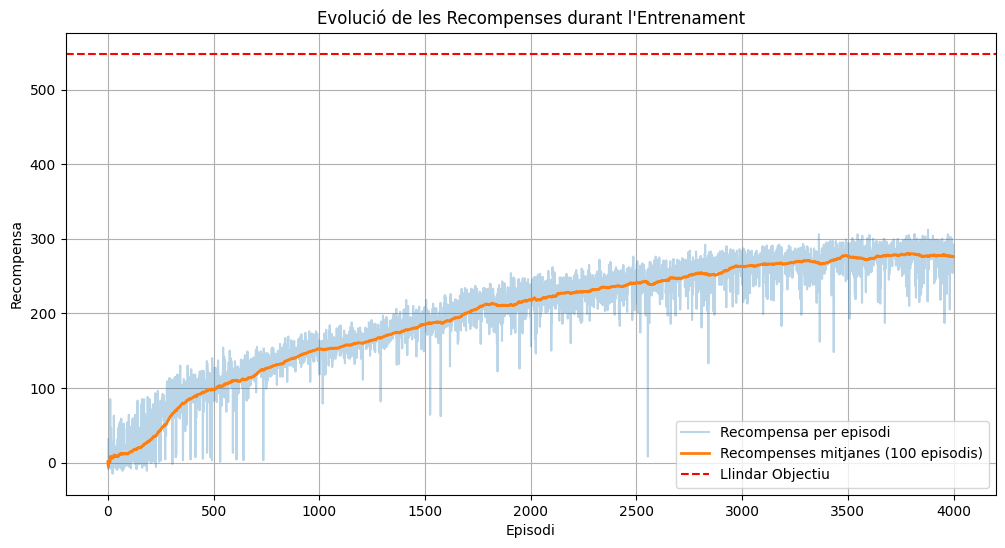

<Figure size 1200x600 with 0 Axes>

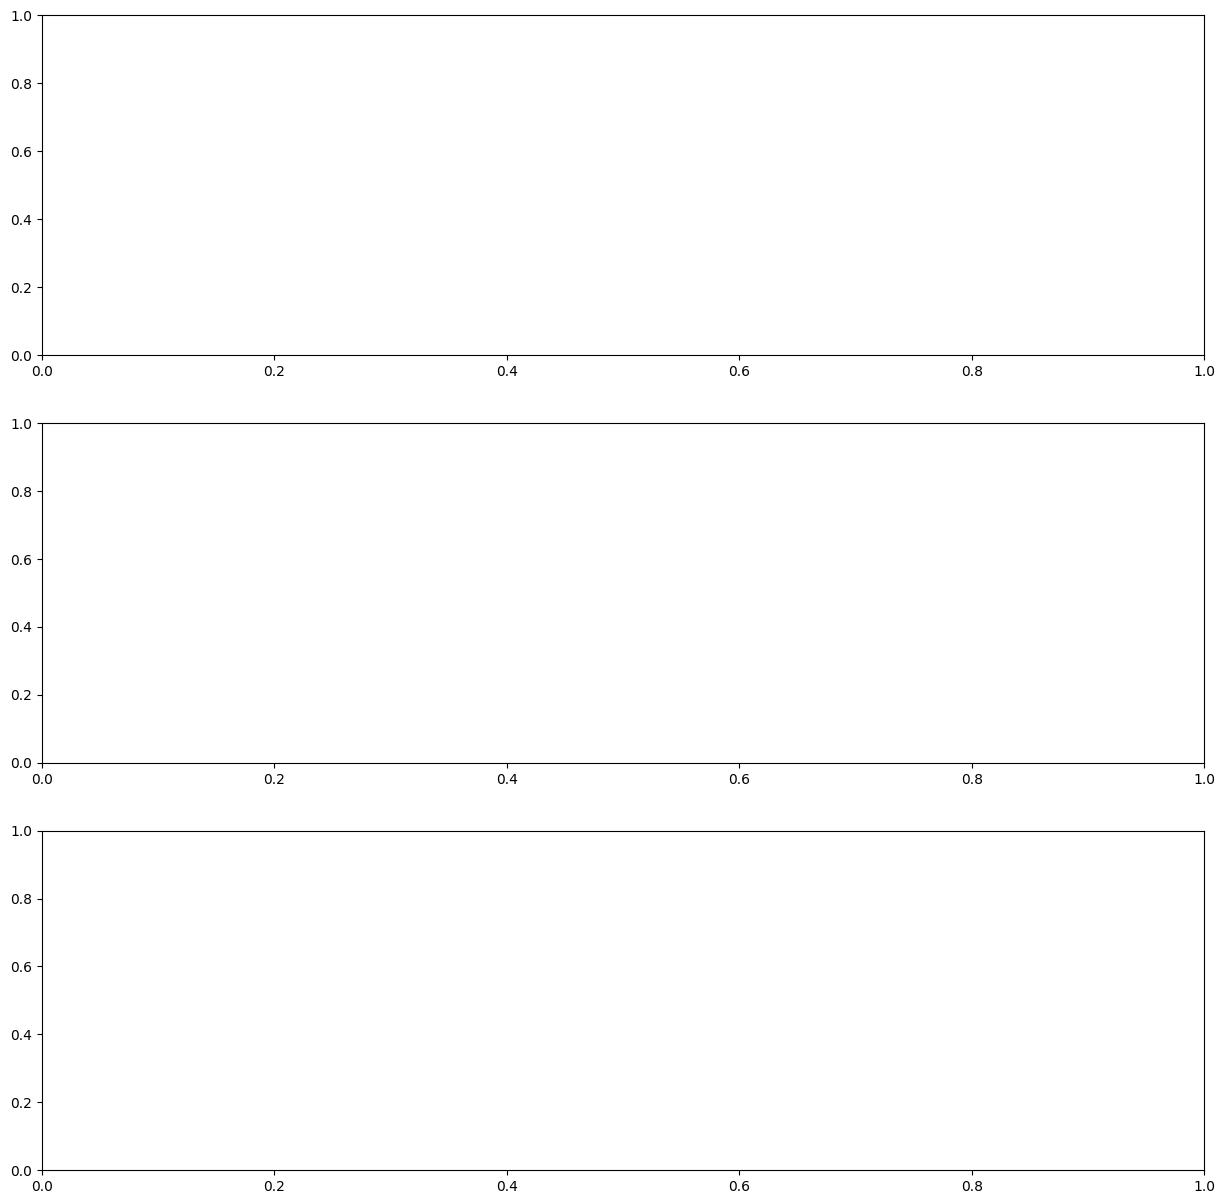

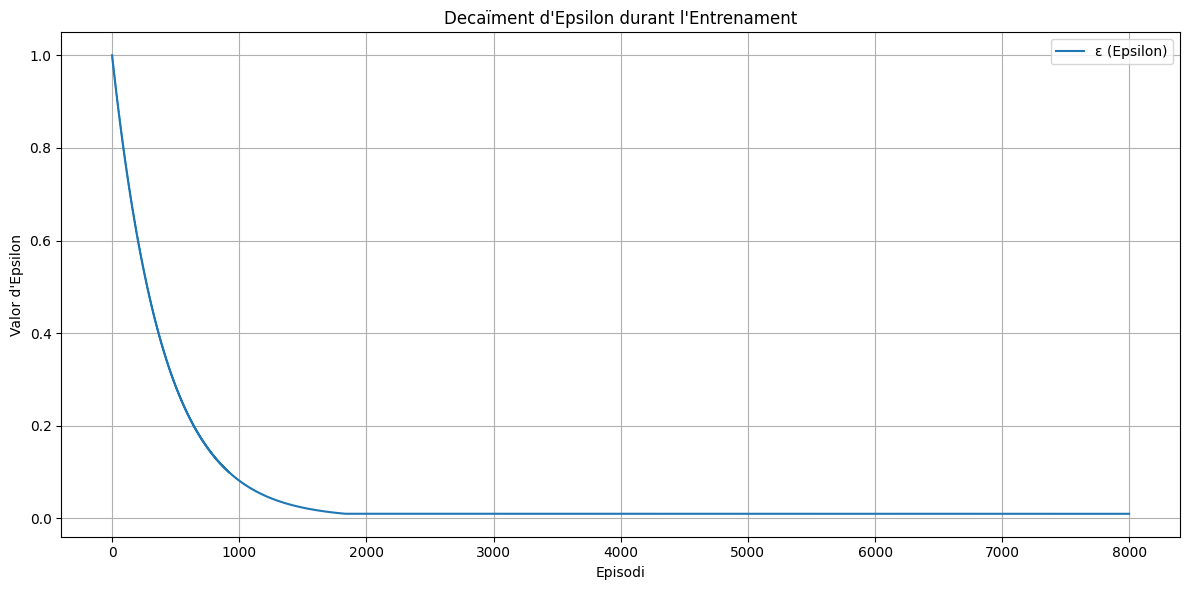

In [31]:
# After training completes, extract metrics from the agent
tr_rewards = agent.rewards_history           # List of rewards per episode
mean_tr_rewards = agent.mean_rewards_history # List of 100-episode averages
tr_loss = agent.update_loss                  # List of losses per update step
eps_evolution = agent.episode_epsilon        # List of epsilon values per episode
th = REWARD_THRESHOLD                        # Precomputed threshold

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# Plot rewards
plt.sca(axs[0])
plot_rewards(tr_rewards, mean_tr_rewards, th)

# Plot loss
plt.sca(axs[1])
plot_loss(tr_loss)

# Plot epsilon
plt.sca(axs[2])
plot_epsilon(eps_evolution)

# Adjust layout and display
plt.tight_layout()
plt.show()

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>
#TODO: Afegeix aquí els teus comentaris sobre l'entrenament, l'evolució de recompenses, pèrdues i epsilon.
</div>

### Gràfic de recompenses

Podem observar una clara tendència a l'alça en la recompensa per episodi (línia blava) a mesura que avança l'entrenament, fet que indica que l'agent està aprenent i millorant el seu rendiment. Respecte a la recompensa mitjana sobre 100 episodis (línia taronja) veiem una evolució més suau, també en augment, confirmant una millora sostinguda en el temps. No obstant això, el llindar objectiu (línia vermella) encara es troba per sobre de les recompenses obtingudes, el que suggereix que l'agent encara no ha assolit el nivell desitjat i podria necessitar més entrenament o ajustaments en l'estratègia d'aprenentatge.


### Gràfic d'èpsilon

Es veu clarament la disminució progressiva d'èpsilon que controla l'exploració de l'agent, indicant que al principi l'agent explora més opcions, però a mesura que avança l'entrenament s'ha anat centrant més en les accions que considera òptimes. Al final dels episodis, el valor d'èpsilon arriba a un nivell gairebé null, la qual cosa pot indicar que l'agent ha après una estratègia estable. No obstant això, un valor d'èpsilon massa baix pot portar a problemes de sobreajustament i falta de flexibilitat davant de situacions noves.

Un cop entrenat l'agent, ens interessa comprovar com de bé ha après i si és capaç de superar l'entorn. Per fer-ho, recuperem el model entrenat i deixem que l'agent prengui accions aleatòries segons aquest model per observar el seu comportament.







### 2.5 Test de l'agent

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 2.5 (0.25 pts):</strong> Carregar el model entrenat i executar l'agent entrenat durant 505 episodis consecutius en diferents períodes aleatoris des de l'any 2015 fins al 2024. Calcula la suma de recompenses per cada execució. Per aconseguir aquest punt, executa:
<ul>
    <li>Un gràfic amb la suma de les recompenses respecte dels episodis, incloent-hi el llindar de recompensa establert.</li>
    <li>Emmagatzema la recompensa mitjana obtinguda en les 100 partides a la variable <code>mean_reward_dqn_test</code> i l'última recompensa obtinguda en l'entrenament a <code>mean_reward_dqn_last</code>. També calcula en quants escenaris s'ha obtingut més de 252 dies positius en el trading.</li>
</ul>

A més, realitza l'anàlisi següent amb el model per a l'entorn utilitzat en l'entrenament:
<ul>
    <li>Reproduir una partida completa de l'agent entrenat i mostrar el resultat final, incloent-hi el valor total del portafoli al final de l'episodi.</li>
    <li>Generar un fitxer CSV que registri els resultats de les interaccions de l'agent amb el mercat en cada episodi i mostra per pantalla les últimes 30 accions.</li>
</ul>

<strong>Comenta tots els resultats obtinguts en aquest apartat. A quines conclusions podem arribar? Com podríem millorar l'entrenament i quines implicacions tindria?</strong>
</div>


In [33]:
import random
import pandas as pd
import numpy as np
# Generar un fitxer CSV que registri els resultats de les interaccions
# de l'agent amb el mercat en cada episodi i mostra per pantalla les últimes 30 accions.
file_path = 'stock_trading_agent_dqn.csv'

# Reproduir una partida completa de l'agent entrenat i mostrar el resultat final,
# incloent-hi el valor total del portafoli al final de l'episodi.
env = StockMarketEnv(
    ticker='SPY',
    start='2015-01-01',
    end='2024-01-01',
    is_eval=True,
    save_to_csv=True,
    csv_filename=file_path
)

def read_csv_and_show_last_30(file_path):
    try:
        # Llegir el fitxer CSV
        df = pd.read_csv(file_path)

        # Verificar que hi ha dades suficients
        if len(df) < 30:
            print(f"Només hi ha {len(df)} registres. Mostrant tots:")
            print(df)
        else:
            print("Últimes 30 accions del fitxer CSV:")
            print(df.tail(30))
    except FileNotFoundError:
        print(f"El fitxer {file_path} no s'ha trobat.")
    except Exception as e:
        print(f"S'ha produït un error en llegir el fitxer: {e}")



[*********************100%***********************]  1 of 1 completed


In [39]:

# Generar calendario de trading usando días hábiles
def generate_random_trading_dates(start_range, end_range, trading_days_target=505):
    """
    Genera un par de fechas (start, end) que tengan exactamente trading_days_target días hábiles.
    """
    start_date = pd.to_datetime(start_range)
    end_date = pd.to_datetime(end_range)

    while True:
        # Seleccionar una fecha de inicio aleatoria
        random_start = start_date + pd.DateOffset(days=random.randint(0, (end_date - start_date).days - trading_days_target))

        # Generar un rango de fechas de trading usando solo los días hábiles
        trading_days = pd.bdate_range(random_start, random_start + pd.DateOffset(days=2 * trading_days_target)).tolist()

        # Filtrar las fechas para obtener exactamente el número de días objetivo
        if len(trading_days) >= trading_days_target:
            random_end = trading_days[trading_days_target - 1]  # Último día de trading en el rango deseado
            return random_start.strftime("%Y-%m-%d"), random_end.strftime("%Y-%m-%d")

def test_model(agent, base_env, start_range, end_range, trading_days_target=505, win_days_target=252):
    """
    Testea el modelo entrenado en 100 episodios con fechas aleatorias de trading.

    Parámetros:
    - agent: Agente entrenado
    - base_env: Entorno base
    - start_range, end_range: Rangos de fechas para generar las fechas de trading
    - trading_days_target: Días de trading por episodio
    - win_days_target: Días positivos requeridos para considerar éxito en un episodio

    Retorna:
    - all_rewards: Lista con las recompensas totales de cada episodio
    - success_rate: Porcentaje de episodios exitosos
    """
    all_rewards = []
    success_count = 0
    interaction_data = []

    for i_episode in range(100):
        # Generar nuevas fechas de inicio y fin aleatorias que cumplan con los días de trading deseados
        start_date, end_date = generate_random_trading_dates(
            start_range,
            end_range,
            trading_days_target
        )

        # Actualizar el entorno con las nuevas fechas
        env = base_env(
            ticker='SPY',
            start=start_date,
            end=end_date,
            is_eval=True,
            save_to_csv=True,
            csv_filename=f'episode_{i_episode+1}_actions.csv'
        )

        state = env.reset()[0]
        total_reward = 0
        win_days = 0
        episode_data = []
        step = 0

        while True:
            # El agente toma una acción
            # action = agent.get_action(state)
            action = agent.main_network.get_action(state)
            next_state, reward, done, trucated, _ = env.step(action)

            # Registrar dades de la interacció
            episode_data.append({
                'episode': i_episode + 1,
                'step': step + 1,
                'date': env.df.index[env.current_step].strftime('%Y-%m-%d'),
                'action': ['Mantenir', 'Comprar', 'Vendre'][action],
                'price': env.prices[env.current_step],
                'shares': env.shares_held,
                'balance': env.balance,
                'portfolio_value': env.net_worth,
                'reward': reward
            })

            step += 1

            # Actualizar recompensas y días positivos
            total_reward += reward
            if reward > 0:
                win_days += 1

            state = next_state

            if done or trucated:
                break

        all_rewards.append(total_reward)
        if win_days >= win_days_target:
            success_count += 1

        # Afegir dades de l'episodi al registre global
        interaction_data.extend(episode_data)

        env.close()

    success_rate = success_count / 100
    return all_rewards, success_rate

def plot_test(rewards, th):
    """
    Grafica los resultados del test.
    - rewards: Lista de recompensas totales por episodio
    - th: Umbral de recompensa establecido
    """

    plt.figure(figsize=(14, 7))

    #Gràfic principal
    plt.plot(rewards, alpha=0.6, color='steelblue', label='Dies Positius per Episodi')

    #Linia de tendència
    z = np.polyfit(range(len(rewards)), rewards, 1)
    p = np.poly1d(z)
    plt.plot(p(range(len(rewards))), "--", color='firebrick', label='Tendència')

    #Mitjana mòbil
    window_size = 30
    moving_avg = pd.Series(rewards).rolling(window_size).mean()
    plt.plot(moving_avg, color='darkorange', label=f'Mitjana Mòbil ({window_size} episodis)')

    #Línia de llindar
    plt.axhline(y=th, color='green', linestyle='--', linewidth=2, label='Objectiu de Rendiment')

    # Configuració del gràfic
    plt.title('Rendiment de la Estratègia en Diferents Condicions de Mercat', fontsize=14)
    plt.xlabel('Número d\'Episodi', fontsize=12)
    plt.ylabel('Dies amb Guany', fontsize=12)
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    # Quadre estadístic
    stats_text = f"""Estadístics Clau:
    - Mitjana: {np.mean(rewards):.1f} dies
    - Màxim: {np.max(rewards)} dies
    - Mínim: {np.min(rewards)} dies
    - Desviació Estàndard: {np.std(rewards):.1f}"""
    plt.gcf().text(0.72, 0.6, stats_text, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

In [41]:
# Execució i càlcul de mètriques
all_rewards, success_count = test_model(
    agent=agent,
    base_env=StockMarketEnv,
    start_range='2015-01-01',
    end_range='2024-01-01'
)

# TODO: Calcular la recompensa mitjana de les 100 partides de test
mean_reward_dqn = np.mean(all_rewards)  # Calcular la mitjana de recompenses obtingudes en el test

# TODO: Assignar la Mean Reward de la última iteració de l'entrenament
mean_reward_dqn_last = mean_rewards_history[-1]  # Última recompensa mitjana obtinguda durant l'entrenament

# TODO: Calcular el percentatge d'episodis exitosos
success_rate = success_count / 100  # Proporció d'episodis amb més de 252 dies positius

# Resultats
print(f"La recompensa mitjana obtinguda per l'agent DQN en les 100 partides de test és: {mean_reward_dqn:.2f} punts.")
print(f"Percentatge d'episodis que van aconseguir guanyar almenys 252 dies: {success_rate * 100:.2f}%")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

NameError: name 'mean_rewards_history' is not defined


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
#TODO







</div>

## 3. Agent Dueling DQN (1.5 pts)

En aquest apartat resoldrem el mateix entorn amb les mateixes característiques per a l'agent, però utilitzant una dueling DQN. Com en el cas anterior, primer definirem el model de xarxa neuronal, després descriurem el comportament de l'agent, l'entrenarem i, finalment, testejarem el funcionament de l'agent entrenat.



### 3.1 Definició de l'arquitectura de la xarxa neuronal

L'objectiu principal de les dueling DQN és "estalviar-se" el càlcul del valor de Q en aquells estats on l'acció que es prengui sigui irrellevant. Per això, es descompon la funció Q en dos components:

$$Q(s, a) = A(s, a) + V(s)$$

Aquesta descomposició es realitza a nivell de l'arquitectura de la xarxa neuronal. Les primeres capes que teníem a la DQN seran comunes, i després la xarxa es dividirà en dues parts separades definides per la resta de capes.

La descomposició en subxarxes del model de la DQN implementada a l'apartat anterior serà:

<ol>
  <li> Bloc comú: </li>
  <ul>
    <li>Una primera capa completament connectada de 256 neurones i <code>bias = True</code>, amb activació ReLU.</li>
    <li>Una segona capa completament connectada de 128 neurones i <code>bias = True</code>, amb activació ReLU.</li>
  </ul>
  <li>Per a cadascuna de les subxarxes d'avantatge \(A(s,a)\) i valor \(V(s)\):</li>
  <ul>
    <li>Una capa completament connectada de 64 neurones i <code>bias = True</code>, amb activació ReLU.</li>
    <li>Una última capa completament connectada i <code>bias = True</code>. Aquesta serà la nostra capa de sortida, i per tant, el nombre de neurones de sortida dependrà de si es tracta de la xarxa \(A(s,a)\), que tindrà tantes neurones com dimensions tingui l'espai d'accions, o si es tracta de la xarxa \(V(s)\), amb un valor per estat.</li>
  </ul>
</ol>

     


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 3.1 (0.5 pts):</strong> Implementar la classe <code>duelingDQN()</code>. Inicialitzar les variables necessàries i definir el model de xarxa neuronal indicat.

-----------------------------------------------------------------------------------------------------------
<b>Nota</b>: se us proporciona el codi preimplementat. La implementació que es demana a l'enunciat està indicada als blocs <i>#TODO</i> i/o amb variables igualades a <i>None</i>.
</div>



In [43]:
import torch.autograd as autograd

class duelingDQN(torch.nn.Module):

    def __init__(self, env, device=None, learning_rate=1e-3):

        """
        Paràmetres
        ==========
        n_inputs: mida de l'espai d'estats
        n_outputs: mida de l'espai d'accions
        actions: array d'accions possibles
        """

        ###################################
        #### TODO: Inicialitzar variables ####
        super(duelingDQN, self).__init__()
        self.device = device if device else ('cuda' if torch.cuda.is_available() else 'cpu')

        self.n_inputs = env.observation_space.shape[0]
        self.n_outputs = env.action_space.n
        self.actions = list(range(self.n_outputs))

        ######

        #######################################
        ## TODO: Construcció de la xarxa neuronal
        # Xarxa comuna
        ## Construcció de la xarxa neuronal

        #xarxa comuna
        self.model_common = nn.Sequential(
            nn.Linear(self.n_inputs, 256, bias=True),
            nn.ReLU(),
            nn.Linear(256, 128, bias=True),
            nn.ReLU()
        )

        # Subxarxa de la funció de Valor
        self.fc_layer_inputs = self.feature_size()


        # Subxarxa d'avantatge (A(s,a))
        self.advantage = nn.Sequential(
            nn.Linear(128, 64, bias=True),
            nn.ReLU(),
            nn.Linear(64, self.n_outputs, bias=True)
        )

        # Subxarxa de valor (V(s))
        self.value = nn.Sequential(
            nn.Linear(128, 64, bias=True),
            nn.ReLU(),
            nn.Linear(64, 1, bias=True),
        )

        #######
        #######################################
        ## TODO: Inicialitzar l'optimitzador
        self.optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)


    #######################################
    ##### TODO: Funció forward #############
    def forward(self, state):
        # Connexió entre capes de la xarxa comuna
        common_out = self.model_common(state)

        # Connexió entre capes de la Subxarxa de Valor
        advantage = self.advantage(common_out)

        # Connexió entre capes de la Subxarxa d'Avantatge
        value = self.value(common_out)


        ## Agregar les dues subxarxes:
        # Q(s,a) = V(s) + (A(s,a) - 1/|A| * sum A(s,a'))
        action = q_values = value + (advantage - advantage.mean(dim=1, keepdim=True))

        return action
    #######



    ### Mètode e-greedy
    def get_action(self, state, epsilon=0.05):
        if np.random.random() < epsilon:
            action = np.random.choice(self.actions)
        else:
            qvals = self.get_qvals(state)
            action = torch.max(qvals, dim=-1)[1].item()
        return action


    def get_qvals(self, state):
        if type(state) is tuple:
            state = np.array([np.ravel(s) for s in state])
        state_t = torch.FloatTensor(state).to(self.device)
        return self.forward(state_t)

    def feature_size(self):
        dummy_input = torch.zeros(1, *env.observation_space.shape).to(self.device)
        return self.model_common(autograd.Variable(dummy_input)).view(1, -1).size(1)


Per al buffer de repetició d'experiències, podem utilitzar exactament la mateixa classe `experienceReplayBuffer` descrita a l'apartat anterior de la DQN.

### 3.2 Definició de l'agent

La diferència entre la DQN i la dueling DQN es centra, com hem vist, en la definició de l'arquitectura de la xarxa. Però el procés d'aprenentatge i actualització és exactament el mateix. Així, podem recuperar la classe implementada a l'apartat anterior, `DQNAgent()`, i reutilitzar-la aquí sota el nom de `duelingDQNAgent()`. L'únic que haurem de fer és afegir l'optimitzador entre les variables a declarar i adaptar la funció de pèrdua al format funcional de PyTorch.


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 3.2 (0.25 pts):</strong> Implementar la classe <code>duelingDQNAgent()</code> com la <code>DQNAgent()</code>
<p>
</p>
De nou, durant el procés s'han d'emmagatzemar (*):
<ul>
    <li>Les recompenses obtingudes a cada pas de l'entrenament</li>
    <li>Les recompenses mitjanes dels 100 episodis anteriors</li>
    <li>La pèrdua durant l'entrenament</li>
    <li>L'evolució de epsilon al llarg de l'entrenament</li>
</ul>

-----------------------------------------------------------------------------------------------------------
<b>Nota</b>: se us proporciona el codi preimplementat. La implementació que es demana a l'enunciat està indicada als blocs <i>#TODO</i> i/o amb variables igualades a <i>None</i>, excepte (*) que indica en quin moment emmagatzemar les variables esmentades.
</div>


In [44]:
class duelingDQNAgent:
    def __init__(self, env, main_network, buffer, reward_threshold, epsilon=0.1, eps_decay=0.99, batch_size=32, device=None):
        """""
        Paràmetres
        ==========
        env: entorn
        target_network: classe amb la xarxa neuronal dissenyada
        target_network: xarxa objectiu
        buffer: classe amb el buffer de repetició d'experiències
        epsilon: epsilon
        eps_decay: decaïment d'epsilon
        batch_size: mida del batch
        nblock: bloc dels X últims episodis dels quals es calcularà la mitjana de recompensa
        reward_threshold: llindar de recompensa definit en l'entorn
        """
        self.device = device if device else ('cuda' if torch.cuda.is_available() else 'cpu')
        ###############################################################
        # Inicialització de variables
        self.env = env
        self.main_network = main_network
        self.target_network = copy.deepcopy(main_network)
        self.buffer = buffer
        self.epsilon = epsilon
        self.eps_decay = eps_decay
        self.batch_size = batch_size
        self.nblock = 100
        self.reward_threshold = reward_threshold
        self.initialize()

    def initialize(self):
        # Variables d'estat i seguiment
        self.state0 = self.env.reset()[0]
        self.total_reward = 0
        self.step_count = 0
        self.rewards_history = []
        self.mean_rewards_history = []
        self.episode_epsilon = []
        self.update_loss = []

    def take_step(self, eps, mode='train'):
        if mode == 'explore':
            action = self.env.action_space.sample()
        else:
            qvals = self.main_network.get_qvals(self.state0)
            action = torch.max(qvals, dim=-1)[1].item()
            self.step_count += 1

        next_state, reward, done, truncated, _ = self.env.step(action)
        self.total_reward += reward

        self.buffer.append(self.state0, action, reward, done, next_state)

        if done or truncated:
            self.state0 = self.env.reset()[0]
            return True
        else:
            self.state0 = next_state
            return False

    def train(self, gamma=0.99, max_episodes=50000,
              batch_size=32,
              dnn_update_frequency=4,
              dnn_sync_frequency=2000, min_episodios=250):
        self.gamma = gamma

        # Fase de burn-in
        print("Omplint el buffer de repetició d'experiències...")
        while self.buffer.burn_in_capacity() < 1:
            self.take_step(self.epsilon, mode='explore')

        episode = 0
        training = True
        print("Entrenant...")
        while training:
            self.state0 = self.env.reset()[0]
            self.total_reward = 0
            gamedone = False
            while not gamedone:
                gamedone = self.take_step(self.epsilon, mode='train')

                ##### Actualitzar la xarxa principal segons la freqüència establerta #######
                if self.step_count % dnn_update_frequency == 0 and len(self.buffer.replay_memory) >= self.batch_size:
                    self.update()

                # Sincronització de xarxes
                if self.step_count % dnn_sync_frequency == 0:
                    self.target_network.load_state_dict(self.main_network.state_dict())

                if gamedone:
                    episode += 1
                    ##################################################################
                    ########Emmagatzemar epsilon, training rewards i loss #######

                    ####
                    self.update_loss = []
                    # Emmagatzemar mètriques
                    self.rewards_history.append(self.total_reward)
                    self.episode_epsilon.append(self.epsilon)

                    # Calcular mitjana mòbil
                    mean_rewards = np.mean(self.rewards_history[-self.nblock:]) if len(self.rewards_history) >= self.nblock else np.mean(self.rewards_history)
                    self.mean_rewards_history.append(mean_rewards)

                    print("\rEpisodi {:d} Recompenses Mitjanes {:.2f} Epsilon {}\t\t".format(
                        episode, mean_rewards, self.epsilon), end="")

                    # Comprovar si s'ha arribat al màxim d'episodis
                    if episode >= max_episodes:
                        training = False
                        print('\nLímit d\'episodis assolit.')
                        break

                    # Finalitza si la mitjana de recompenses arriba al llindar fixat
                    if mean_rewards >= self.reward_threshold and episode >= min_episodios:
                        training = False
                        print('\nEntorn resolt en {} episodis!'.format(episode))
                        break

                    # Actualització d'epsilon
                    self.epsilon = max(self.epsilon * self.eps_decay, 0.01)

    ## Càlcul de la pèrdua
    def calculate_loss(self, batch):
        # Separem les variables de l'experiència i les convertim a tensors
        states, actions, rewards, dones, next_states = [i for i in batch]
        rewards_vals = torch.FloatTensor(rewards).to(self.device).reshape(-1, 1)
        actions_vals = torch.LongTensor(np.array(actions)).reshape(-1, 1).to(self.device)
        dones_t = torch.ByteTensor(dones).to(self.device)

        # Obtenim els valors de Q de la xarxa principal
        qvals = torch.gather(self.main_network.get_qvals(states).to(self.device), 1, actions_vals)

        # Obtenim els valors de Q de la xarxa objectiu
        next_actions = torch.max(self.main_network.get_qvals(next_states).to(self.device), dim=-1)[1]
        next_actions_vals = next_actions.reshape(-1, 1).to(self.device)
        target_qvals = self.target_network.get_qvals(next_states).to(self.device)
        qvals_next = torch.gather(target_qvals, 1, next_actions_vals).detach()

        qvals_next[dones_t.bool()] = 0

        # Calculem equació de Bellman
        expected_qvals = None
        # Funció de pèrdua
        loss = torch.nn.MSELoss()(qvals, expected_qvals.reshape(-1, 1))
        return loss

    def update(self):
        self.main_network.optimizer.zero_grad()  # Eliminem qualsevol gradient passat
        batch = self.buffer.sample_batch(batch_size=self.batch_size)  # Seleccionem un conjunt del buffer
        loss = self.calculate_loss(batch)  # Calculem la pèrdua
        loss.backward()  # Obtenim els gradients
        self.main_network.optimizer.step()  # Apliquem els gradients a la xarxa neuronal
        # Emmagatzemem els valors de pèrdua
        if self.device == 'cuda':
            self.update_loss.append(loss.detach().cpu().numpy())
        else:
            self.update_loss.append(loss.detach().numpy())


### 3.3 Entrenament del Model

A continuació, entrenarem el model **dueling DQN** amb els mateixos hiperparàmetres amb què vam entrenar la DQN.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 3.3 (0.25):</strong> Carregar el model de xarxa neuronal i entrenar l'agent amb els mateixos hiperparàmetres utilitzats per a la DQN.
</div>


In [50]:
# TODO: Temps d'execució 69 minuts a Google Colaboratory amb GPU.
# Resultat esperat al voltant de 180-200 punts.

# Define variables
learning_rate = 0.0005
batch_size = 128
max_episodes = 4000
BURN_IN = 1000
dnn_update_frequency = 6
dnn_sync_frequency = 15
MEMORY_SIZE = 50000
gamma = 0.99
epsilon = 1.0  # inicialitzar epsilon
eps_decay = 0.995
min_episodes = 300
ticker = 'SPY'
start = '2020-01-01'
end = '2023-01-01'

# Calcular el nombre de dies de trading entre les dates
num_days = (end_date - start_date).days

print(f"Nombre de dies de trading per {ticker} des de {start} fins a {end}: {num_days}")
print(f"El nostre objectiu és guanyar el 50% dels dies: {round(num_days / 2)}")

# Calcular el REWARD_THRESHOLD
REWARD_THRESHOLD = round(num_days / 2)
print(f"REWARD_THRESHOLD calculat: {REWARD_THRESHOLD}")

env = StockMarketEnv(ticker=ticker, start=start, end=end)
buffer = experienceReplayBuffer(memory_size=MEMORY_SIZE, burn_in=BURN_IN)
main_network = duelingDQN(env, learning_rate=learning_rate)

# Create DQN agent
agent = duelingDQNAgent(
    env=env,
    main_network=main_network,
    buffer=buffer,
    reward_threshold=REWARD_THRESHOLD,
    epsilon=epsilon,
    eps_decay=eps_decay,
    batch_size=batch_size
)

# Start training
agent.train(
    gamma=gamma,
    max_episodes=max_episodes,
    batch_size=batch_size,
    dnn_update_frequency=dnn_update_frequency,
    dnn_sync_frequency=dnn_sync_frequency,
    min_episodios=min_episodes
)

[*********************100%***********************]  1 of 1 completed

Nombre de dies de trading per SPY des de 2020-01-01 fins a 2023-01-01: 1096
El nostre objectiu és guanyar el 50% dels dies: 548
REWARD_THRESHOLD calculat: 548
Omplint el buffer de repetició d'experiències...
Entrenant...


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

### 3.4 Anàlisi de l'Entrenament

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 3.4 (0.25 pts):</strong> Mostrar els mateixos gràfics que amb la DQN:
<ol>
    <li>Recompenses obtingudes al llarg de l'entrenament i l'evolució de les recompenses mitjanes cada 100 episodis, juntament amb el llindar de recompensa establert per l'entorn</li>
    <li>Pèrdua durant l'entrenament</li>
    <li>Evolució de epsilon al llarg de l'entrenament</li>
</ol>
</div>


### 3.5 Test de l'Agent

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 3.5 (0.25 pts):</strong> Carregar el model entrenat i executar l'agent entrenat durant 505 episodis consecutius en diferents períodes aleatoris des de l'any 2015 fins al 2024. Calcula la suma de recompenses per cada execució. Per aconseguir aquest punt, executa:
<ul>
    <li>Un gràfic amb la suma de les recompenses respecte dels episodis, incloent-hi el llindar de recompensa establert.</li>
    <li>Emmagatzema la recompensa mitjana obtinguda en les 100 partides a la variable <code>mean_reward_agentduelingDQN</code> i l'última recompensa obtinguda en l'entrenament a <code>mean_reward_agentduelingDQN_last</code>.</li>
</ul>
A més, realitza l'anàlisi següent amb el model per a l'entorn utilitzat durant l'entrenament:
<ul>
    <li>Reproduir una partida completa de l'agent entrenat i mostrar el resultat final, incloent-hi el valor total del portafoli al final de l'episodi.</li>
    <li>Generar un fitxer CSV que registri els resultats de les interaccions de l'agent amb el mercat en cada episodi i mostrar per pantalla les últimes 30 accions.</li>
</ul>
<strong>Comenta tots els resultats obtinguts en aquest apartat. A quines conclusions podem arribar? Com podríem millorar l'entrenament i quines implicacions tindria?</strong>
</div>


In [ ]:
file_path = "stock_trading_agent_ddqn.csv"
env = None  # TODO: Assignar l'entorn entrenat

mean_reward_agentduelingDQN = 0  # TODO: Calcular la recompensa mitjana en les 100 partides de test
mean_reward_agentduelingDQN_last = 0  # TODO: Assignar la recompensa mitjana de l'última iteració de l'entrenament

print(f"La recompensa mitjana obtinguda per l'agent DQN en les 100 partides de test és: {mean_reward_agentduelingDQN:.2f} punts.")



## 4. Comparació dels resultats (1.5 pts)

Ara compararem els resultats. Si has seguit totes les indicacions, hauràs emmagatzemat mètriques bastant interessants que et permetran interpretar els resultats obtinguts.


In [ ]:
# Defineix les dades de la taula
data = [
    ["DQN", mean_reward_dqn_last, mean_reward_dqn, time_dqn],
    ["Dueling DQN", mean_reward_agentduelingDQN_last, mean_reward_agentduelingDQN, time_ddqn],
]

# Defineix els encapçalaments de la taula
headers = ["Agent", "Mitjana Reward d'Entrenament", "Mitjana test amb 100 Partides Aleatòries", "Temps d'entrenament"]

# Imprimeix la taula
table = tabulate(data, headers, tablefmt="pipe")
print(table)


**texto en negrita**<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 4 (1.5 pts):</strong>

Comenta els resultats obtinguts. Quin agent ha obtingut millors resultats? Justifica'l
    
</div>



<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentaris:</strong>
<br><br>
</div>

## 5. Compara els agents en un altre entorn (2 pts)

En aquesta part de la PAC, compararem com es desenvolupa cadascun dels agents en un altre entorn diferent implementat per un tercer.

Un dels beneficis d'haver utilitzat Gymnasium és que podem utilitzar ràpidament els nostres algorismes en qualsevol entorn que comparteixi la mateixa interfície. Un exemple pot ser [Cart Pole](https://gymnasium.farama.org/environments/classic_control/cart_pole/), un entorn clàssic que consisteix en un carretó sobre el qual s'aguanta una barra vertical. L'objectiu és mantenir la barra en equilibri evitant que caigui, aplicant petites forces al carretó cap a la dreta o cap a l'esquerra. Les úniques accions possibles són aquestes forces, que permeten a l'algorisme aprendre a mantenir l'equilibri de la barra a la posició correcta.

![cartpole](https://gymnasium.farama.org/_images/cart_pole.gif)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici 5 (2 pts):</strong>

Executa l'agent DQN i Dueling DQN en el nou entorn. Un cop ho hagis fet, implementa una taula com la mostrada a l'exercici anterior i analitza els resultats. Continua sent el mateix agent el que ha obtingut millor resultat?
</div>


In [ ]:
# Configuració d'hiperparàmetres per a DQN.
lr = None             # Velocitat d'aprenentatge ajustada per a una millor convergència
MEMORY_SIZE = None     # Capacitat de memòria reduïda, suficient per a un entorn senzill com CartPole
MAX_EPISODES = 5000     # Nombre màxim d'episodis reduït, ja que CartPole és un problema més simple
EPSILON = None             # Valor inicial d'epsilon (alta exploració inicial)
EPSILON_DECAY = None    # Decaïment d'epsilon ajustat per a un descens més gradual
GAMMA = None           # Factor de descompte gamma
BATCH_SIZE = None         # Mida del lot per a l'entrenament
BURN_IN = None           # Episodis inicials per omplir el buffer d'experiència abans d'entrenar
DNN_UPD = 1             # Freqüència d'actualització de la xarxa neuronal (cada pas)
DNN_SYNC = 1000         # Freqüència de sincronització de pesos


In [ ]:
from tqdm import tqdm

def test_model(ag, env):
    all_rewards = []
    # Fem servir tqdm per al bucle d'episodis
    for i_episode in tqdm(range(100), desc="Progrés d'episodis"):
        # TODO: Implementar el test de l'agent
        pass

    return all_rewards


def plot_test(rewards, th):
    # TODO: Implementar la visualització dels resultats
    pass


In [ ]:
# Utilitza les funcions anteriors per imprimir l'evolució dels agents.







In [ ]:
# Mostra les dades dels entrenaments de cada agent.
data = [
    ["DQN", mean_reward_dqn_last, mean_reward_dqn, time_dqn],
    ["Dueling DQN", mean_reward_agentduelingDQN_last, mean_reward_agentduelingDQN, time_ddqn],
]

# Defineix els encapçalaments de la taula
headers = ["Agent", "Mitjana Reward d'Entrenament", "Mitjana test amb 100 Partides Aleatòries", "Temps d'entrenament"]

# Imprimeix la taula
table = tabulate(data, headers, tablefmt="pipe")
print(table)
